# DPCRO_SL Guide

In [36]:
import sys
sys.path.insert(0, "..")

from PyCROSL.CRO_SL import *
from PyCROSL.AbsObjectiveFunc import *
from PyCROSL.SubstrateReal import *

The first step will be to define the objective function that will be optimized, this will be done taking as a base the class AbsObjectiveFunc.
In this case, we will optimize a very simple function, simply adding the squared components of the vector. 

In [37]:

"""
All the following methods will have to be implemented for the algorithm to work properly
with the same inputs, except for the constructor 
"""
class SumSquare(AbsObjectiveFunc):
    """
    This is the constructor of the class, here is where the objective function can be setted up.
    In this case we will only add the size of the vector as a parameter.
    """
    def __init__(self, size):
        self.size = size
        self.opt = "min" # it can be "max" or "min"
        self.sup_lim = np.full(size, 100) # array where each component indicates the maximum value of the component of the vector
        self.inf_lim = np.full(size, -100) # array where each component indicates the minimum value of the component of the vector

        # we call the constructor of the superclass with the size of the vector
        # and wether we want to maximize or minimize the function 
        super().__init__(self.size, self.opt, self.sup_lim, self.inf_lim)
    
    """
    This will be the objective function, that will recieve a vector and output a number
    """
    def objective(self, solution):
        return (solution**2).sum()
    
    """
    This will be the function used to generate random vectorsfor the initializatio of the algorithm
    """
    def random_solution(self):
        return (self.sup_lim - self.inf_lim)*np.random.random(self.size) + self.inf_lim
    
    """
    This will be the function that will repair solutions, or in other words, makes a solution
    outside the domain of the function into a valid one.
    If this is not needed simply return "solution"
    """
    def check_bounds(self, solution):
        return np.clip(solution, self.inf_lim, self.sup_lim)

In [38]:
objfunc = SumSquare(30)

Now that we have our objective function, we can proceed to initialize the optimization algorithm.

First, we configure the hyperparameters of the algorithm in a dictionary, a detailed list of the parameters needed can be found on the README.md file. Here we use a configuration that should work ok in most cases.

In [39]:

params = {
    "popSize": 100,
    "rho": 0.6,
    "Fb": 0.98,
    "Fd": 0.2,
    "Pd": 0.8,
    "k": 3,
    "K": 20,
    "group_subs": True,

    "stop_cond": "neval",
    "time_limit": 4000.0,
    "Ngen": 10000,
    "Neval": 3e5,
    "fit_target": 1000,

    "verbose": True,
    "v_timer": 1,
    "Njobs": 8,

    "dynamic": True,
    "dyn_method": "success",
    "dyn_metric": "avg",
    "dyn_steps": 10,
    "prob_amp": 0.01
}

Since this algorithm relies on the mixing of different mutation and recombination operators, we will create the list of operators to be used. To create an operator we create an instance of the class SubstrateReal in case we are working with real valued vectors, and SubstrateInt if we are working with discrete valued vectors.

Each operator has it's own parameters that will be specified in the creation of the operator

In [40]:
operators = [
    SubstrateReal("DE/rand/1", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/best/2", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/current-to-best/1", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/current-to-rand/1", {"F": 0.7, "Cr":0.8})
]

Now we simply create an instance of the CRO_SL algorithm with the previous data. 

In [41]:
cro_alg = CRO_SL(objfunc, operators, params)

And we call the optimize function to find a suitable solution. This function will return the best solution along with its value in the objective function

In [42]:
solution, obj_value = cro_alg.optimize()

Time Spent 1.0s:
	Generation: 337
	Best fitness: 1.6300870149031668e-08
	Evaluations of fitness: 27593
	Substrate probability:
		DE/rand/1:           0.006809
		DE/best/2:           0.028613
		DE/current-to-best/1:0.959447
		DE/current-to-rand/1:0.00513

Time Spent 2.0s:
	Generation: 724
	Best fitness: 1.1646992624733378e-10
	Evaluations of fitness: 59499
	Substrate probability:
		DE/rand/1:           0.445671
		DE/best/2:           0.544099
		DE/current-to-best/1:0.005003
		DE/current-to-rand/1:0.005227

Time Spent 3.01s:
	Generation: 1084
	Best fitness: 2.1059029828076878e-21
	Evaluations of fitness: 89021
	Substrate probability:
		DE/rand/1:           0.004902
		DE/best/2:           0.004902
		DE/current-to-best/1:0.765136
		DE/current-to-rand/1:0.22506

Time Spent 4.01s:
	Generation: 1496
	Best fitness: 2.8811854706001867e-24
	Evaluations of fitness: 123045
	Substrate probability:
		DE/rand/1:           0.004902
		DE/best/2:           0.004902
		DE/current-to-best/1:0.327529
		DE/c

In [43]:
solution

array([-5.23263748e-32, -1.13362300e-31,  1.42054844e-31,  6.33278770e-32,
        7.38453978e-32,  3.39845528e-32,  1.75094372e-32,  1.04722976e-31,
       -1.04886262e-31, -1.07195740e-31,  2.05166088e-32, -7.97800702e-32,
       -1.35611909e-31,  1.28871725e-31,  2.97310112e-31, -1.31530474e-31,
       -6.63406498e-32, -5.28761515e-32,  5.08599481e-32,  1.06069210e-31,
       -1.20834387e-31, -8.22095236e-32, -2.07667896e-31, -8.95782119e-32,
       -6.43930037e-32, -1.08863199e-31,  8.37145502e-32,  1.62523779e-31,
        1.20480375e-32,  6.99634992e-32])

In [44]:
obj_value

3.7563431157968346e-61

We will also be able to visualize the progress curve and the probability assiciated to each operator in each step, this will be done with the display_report method.

Number of generations: 3648
Real time spent: 9.97649s
CPU time spent: 9.98198s
Number of fitness evaluations: 300037
	Substrate probability:
		DE/rand/1:           0.114383
		DE/best/2:           0.87577
		DE/current-to-best/1:0.004944
		DE/current-to-rand/1:0.004903
Best fitness: 3.7563431157968346e-61


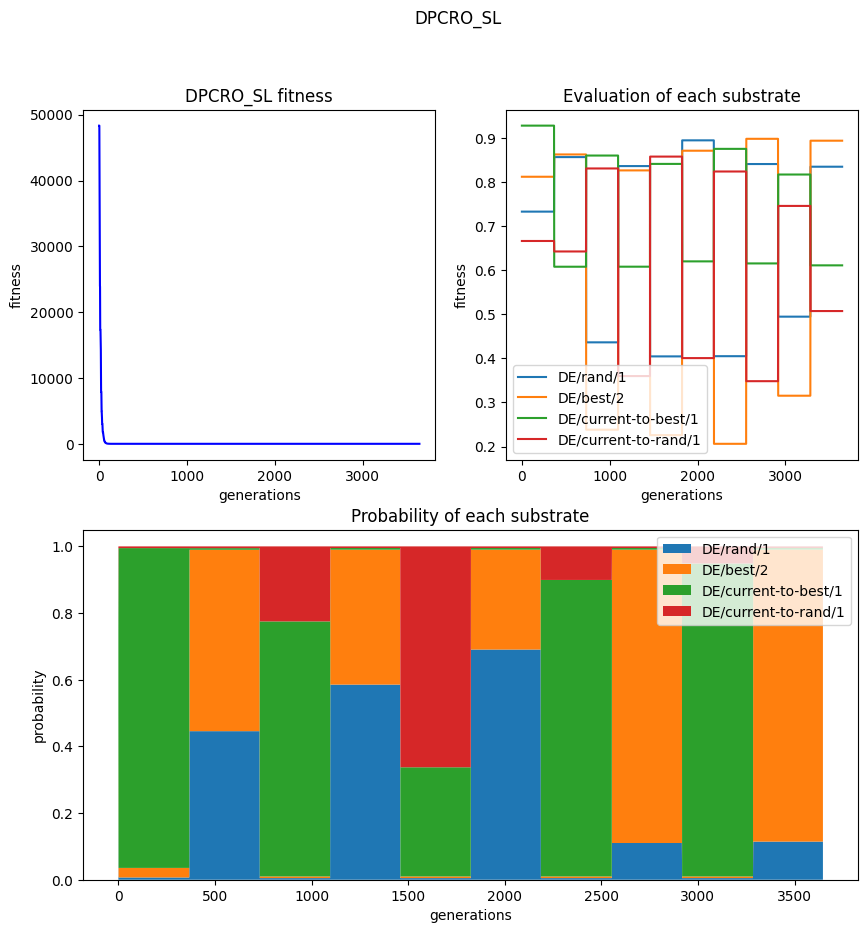

In [45]:
cro_alg.display_report()

If we want to store a solution into a file, we will be able to do so with the save_soluition method. It will save the vector and it's associated objective function value in a .csv file.

In [46]:
cro_alg.save_solution("example.csv")